In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

In [84]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv")
X = df.drop(columns='Customer_Segment',axis=1)
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [85]:
X.drop_duplicates(inplace=True)
X.duplicated().sum()

0

In [86]:
X.dropna(inplace=True)
X.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

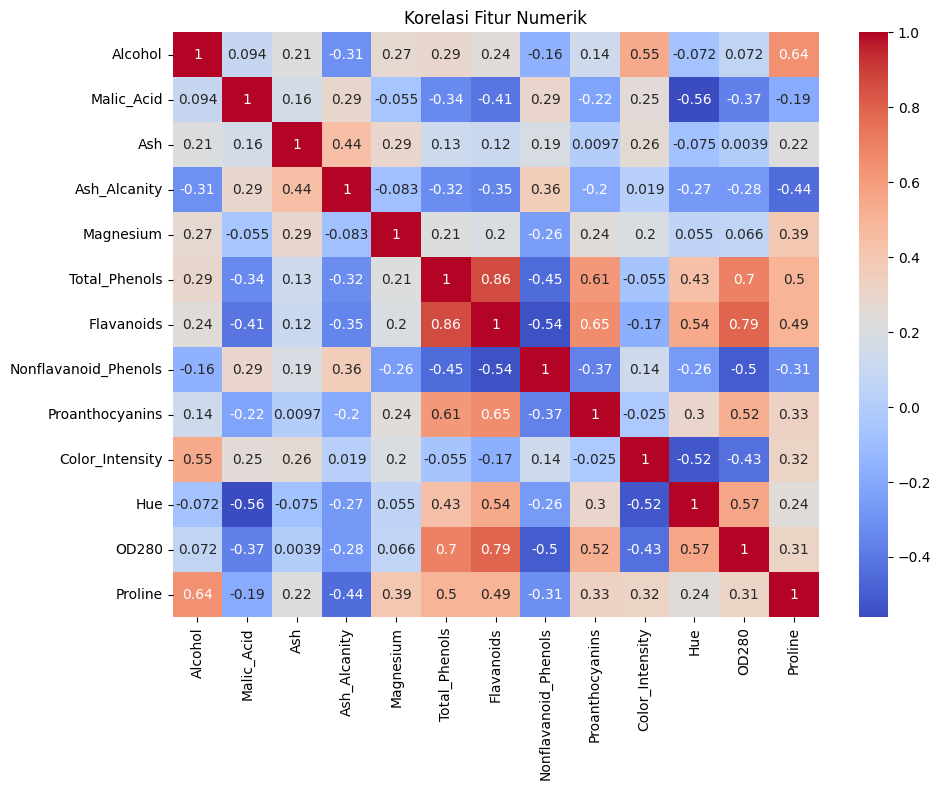

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

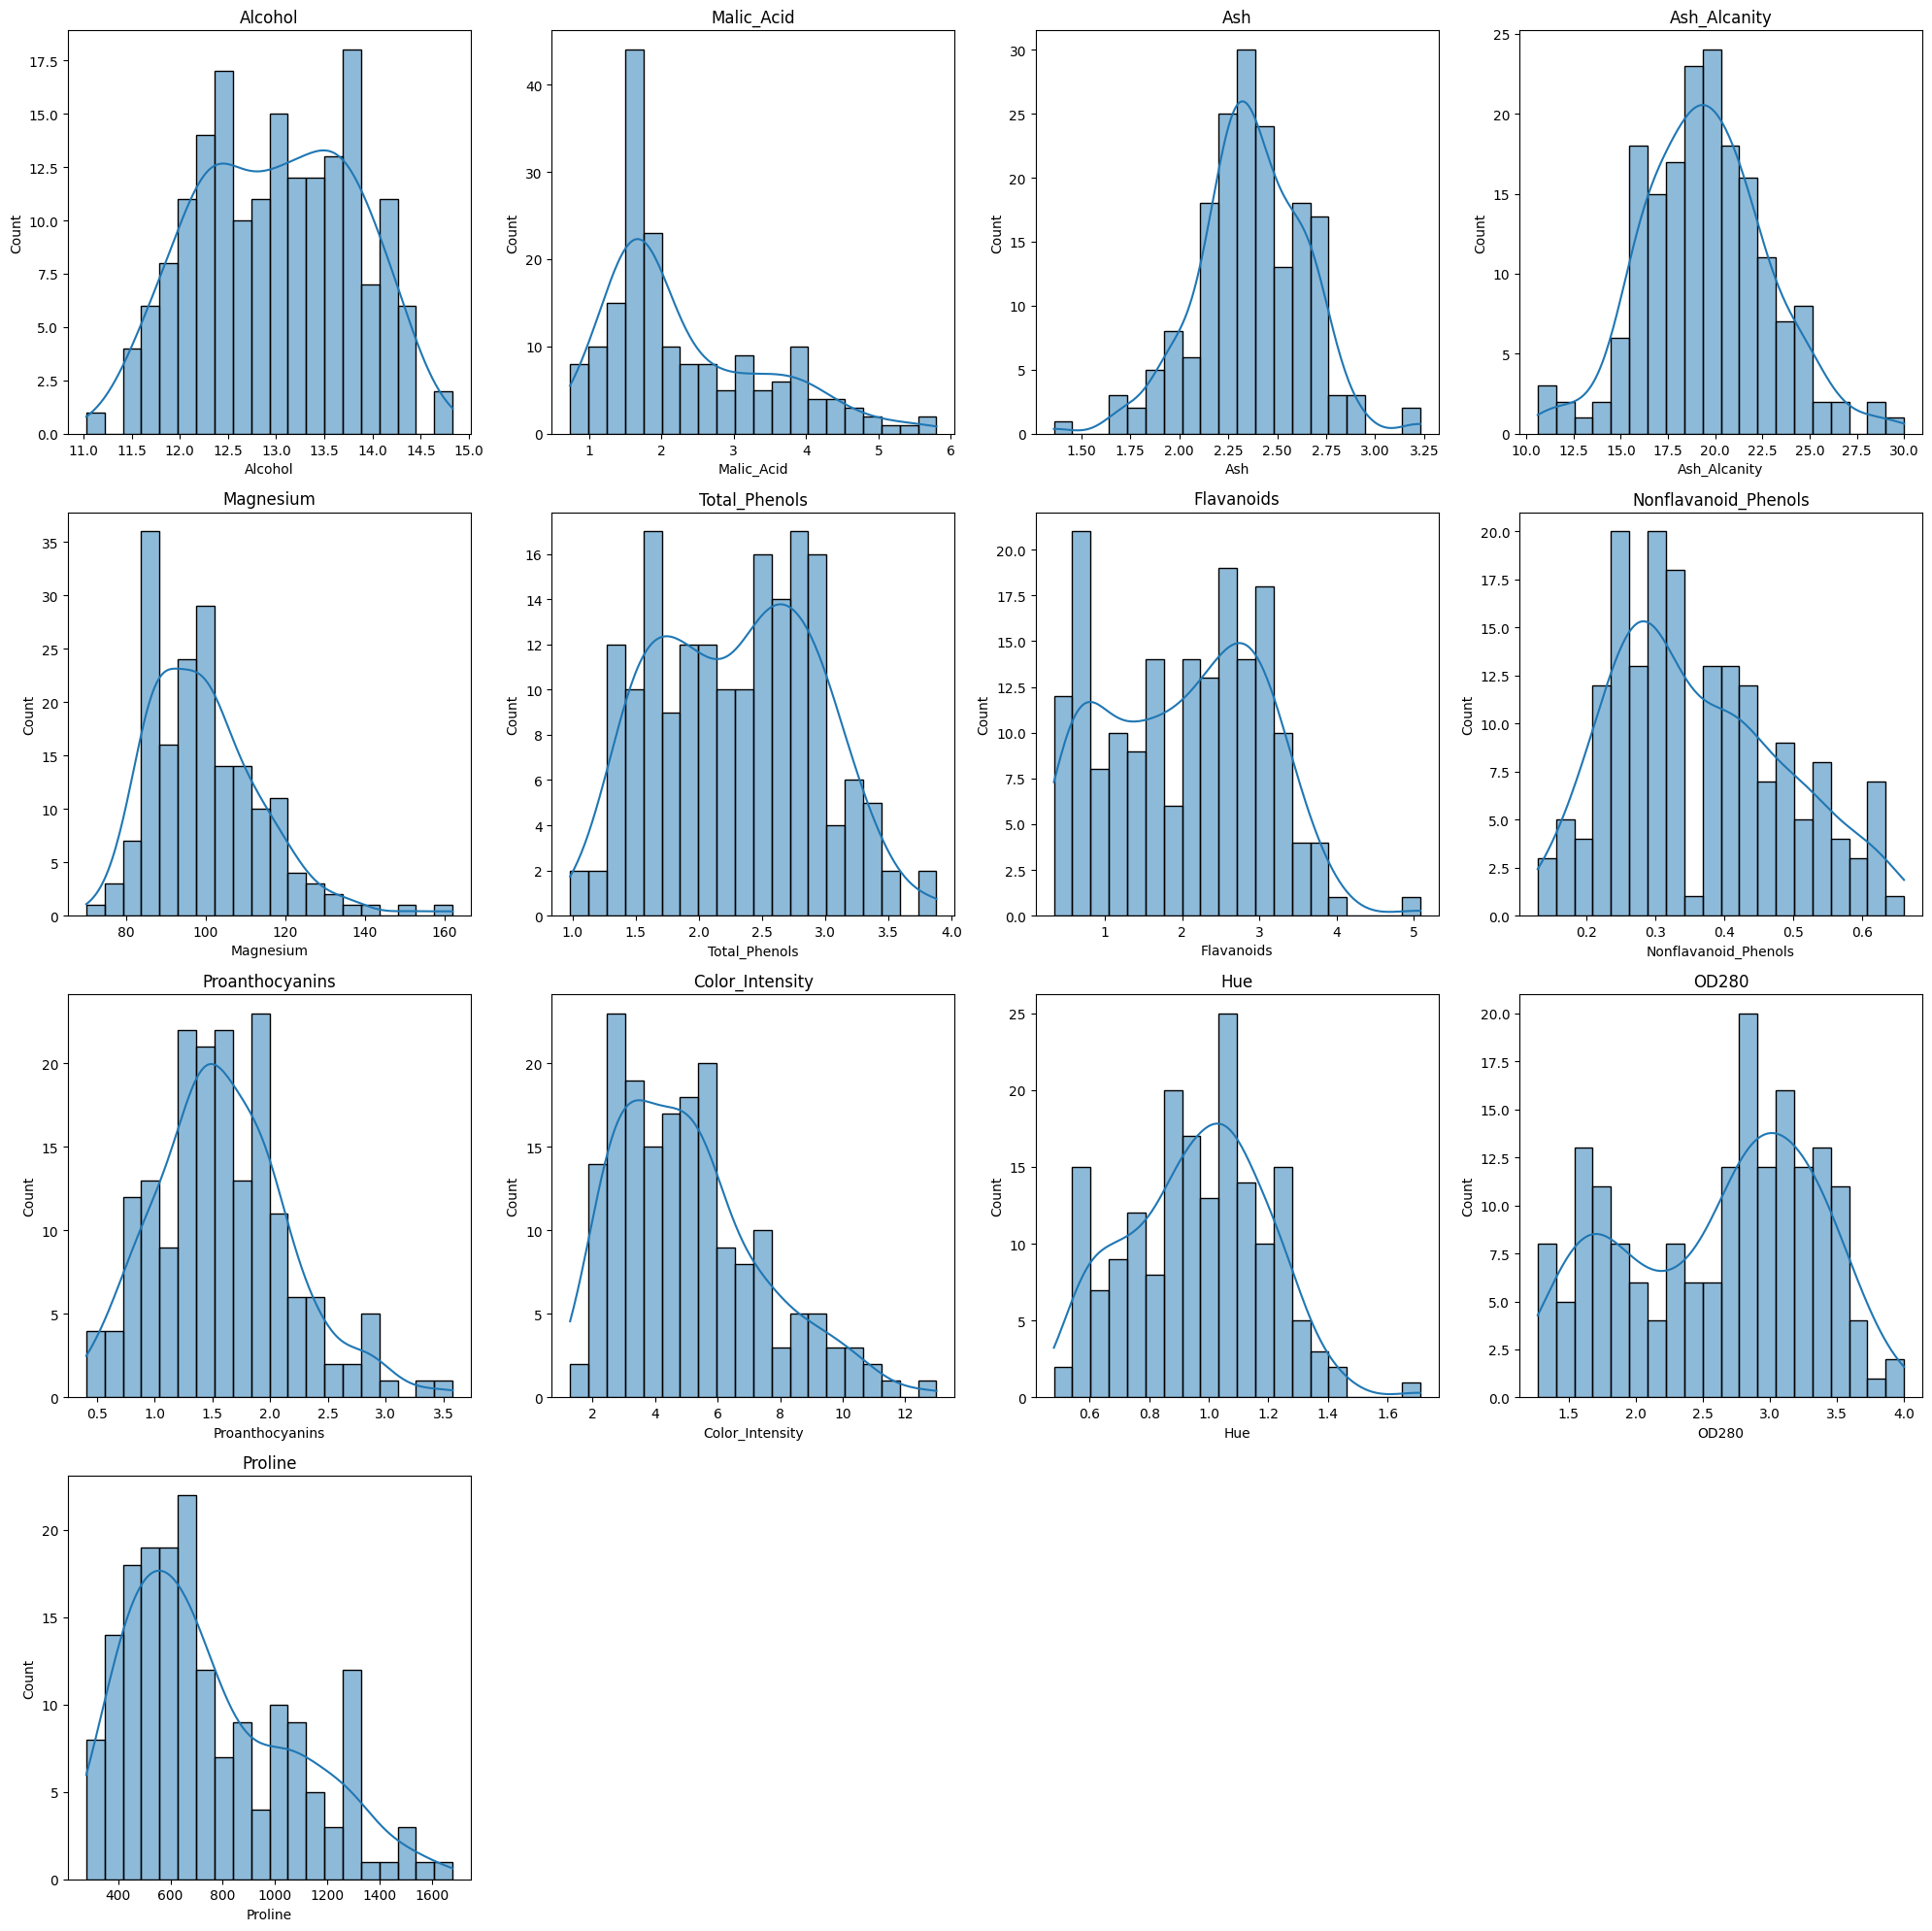

In [12]:
numeric_cols = X.columns
n_cols = len(numeric_cols)

rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    if i < n_cols:
        col = numeric_cols[i]
        sns.histplot(X[col], bins=20, kde=True, ax=ax)
        ax.set_title(f'{col}')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

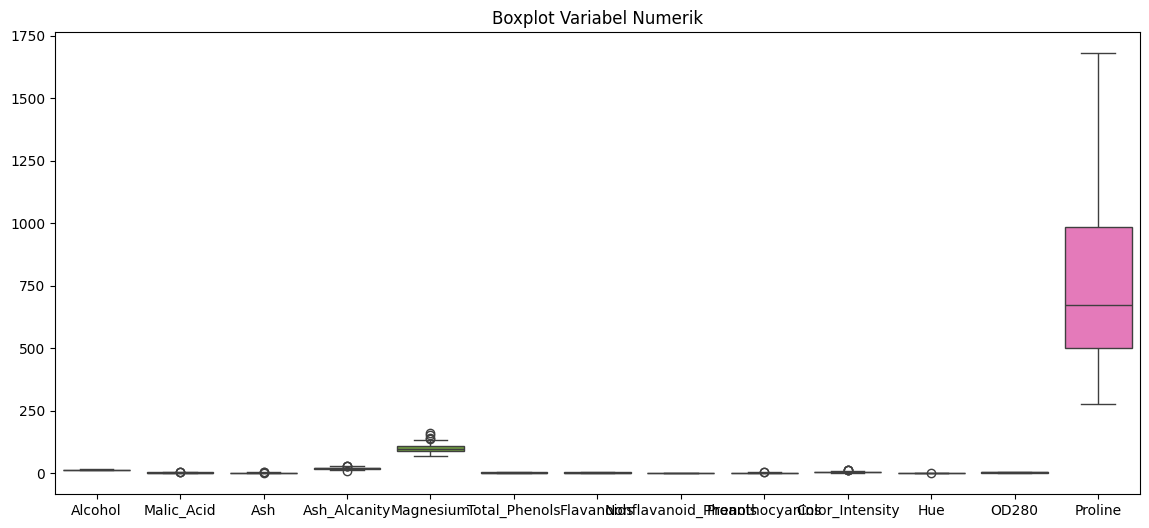

In [15]:
plt.figure(figsize=(14,6))
sns.boxplot(data=X)
plt.title('Boxplot Variabel Numerik')
plt.show()

<Figure size 2000x2000 with 0 Axes>

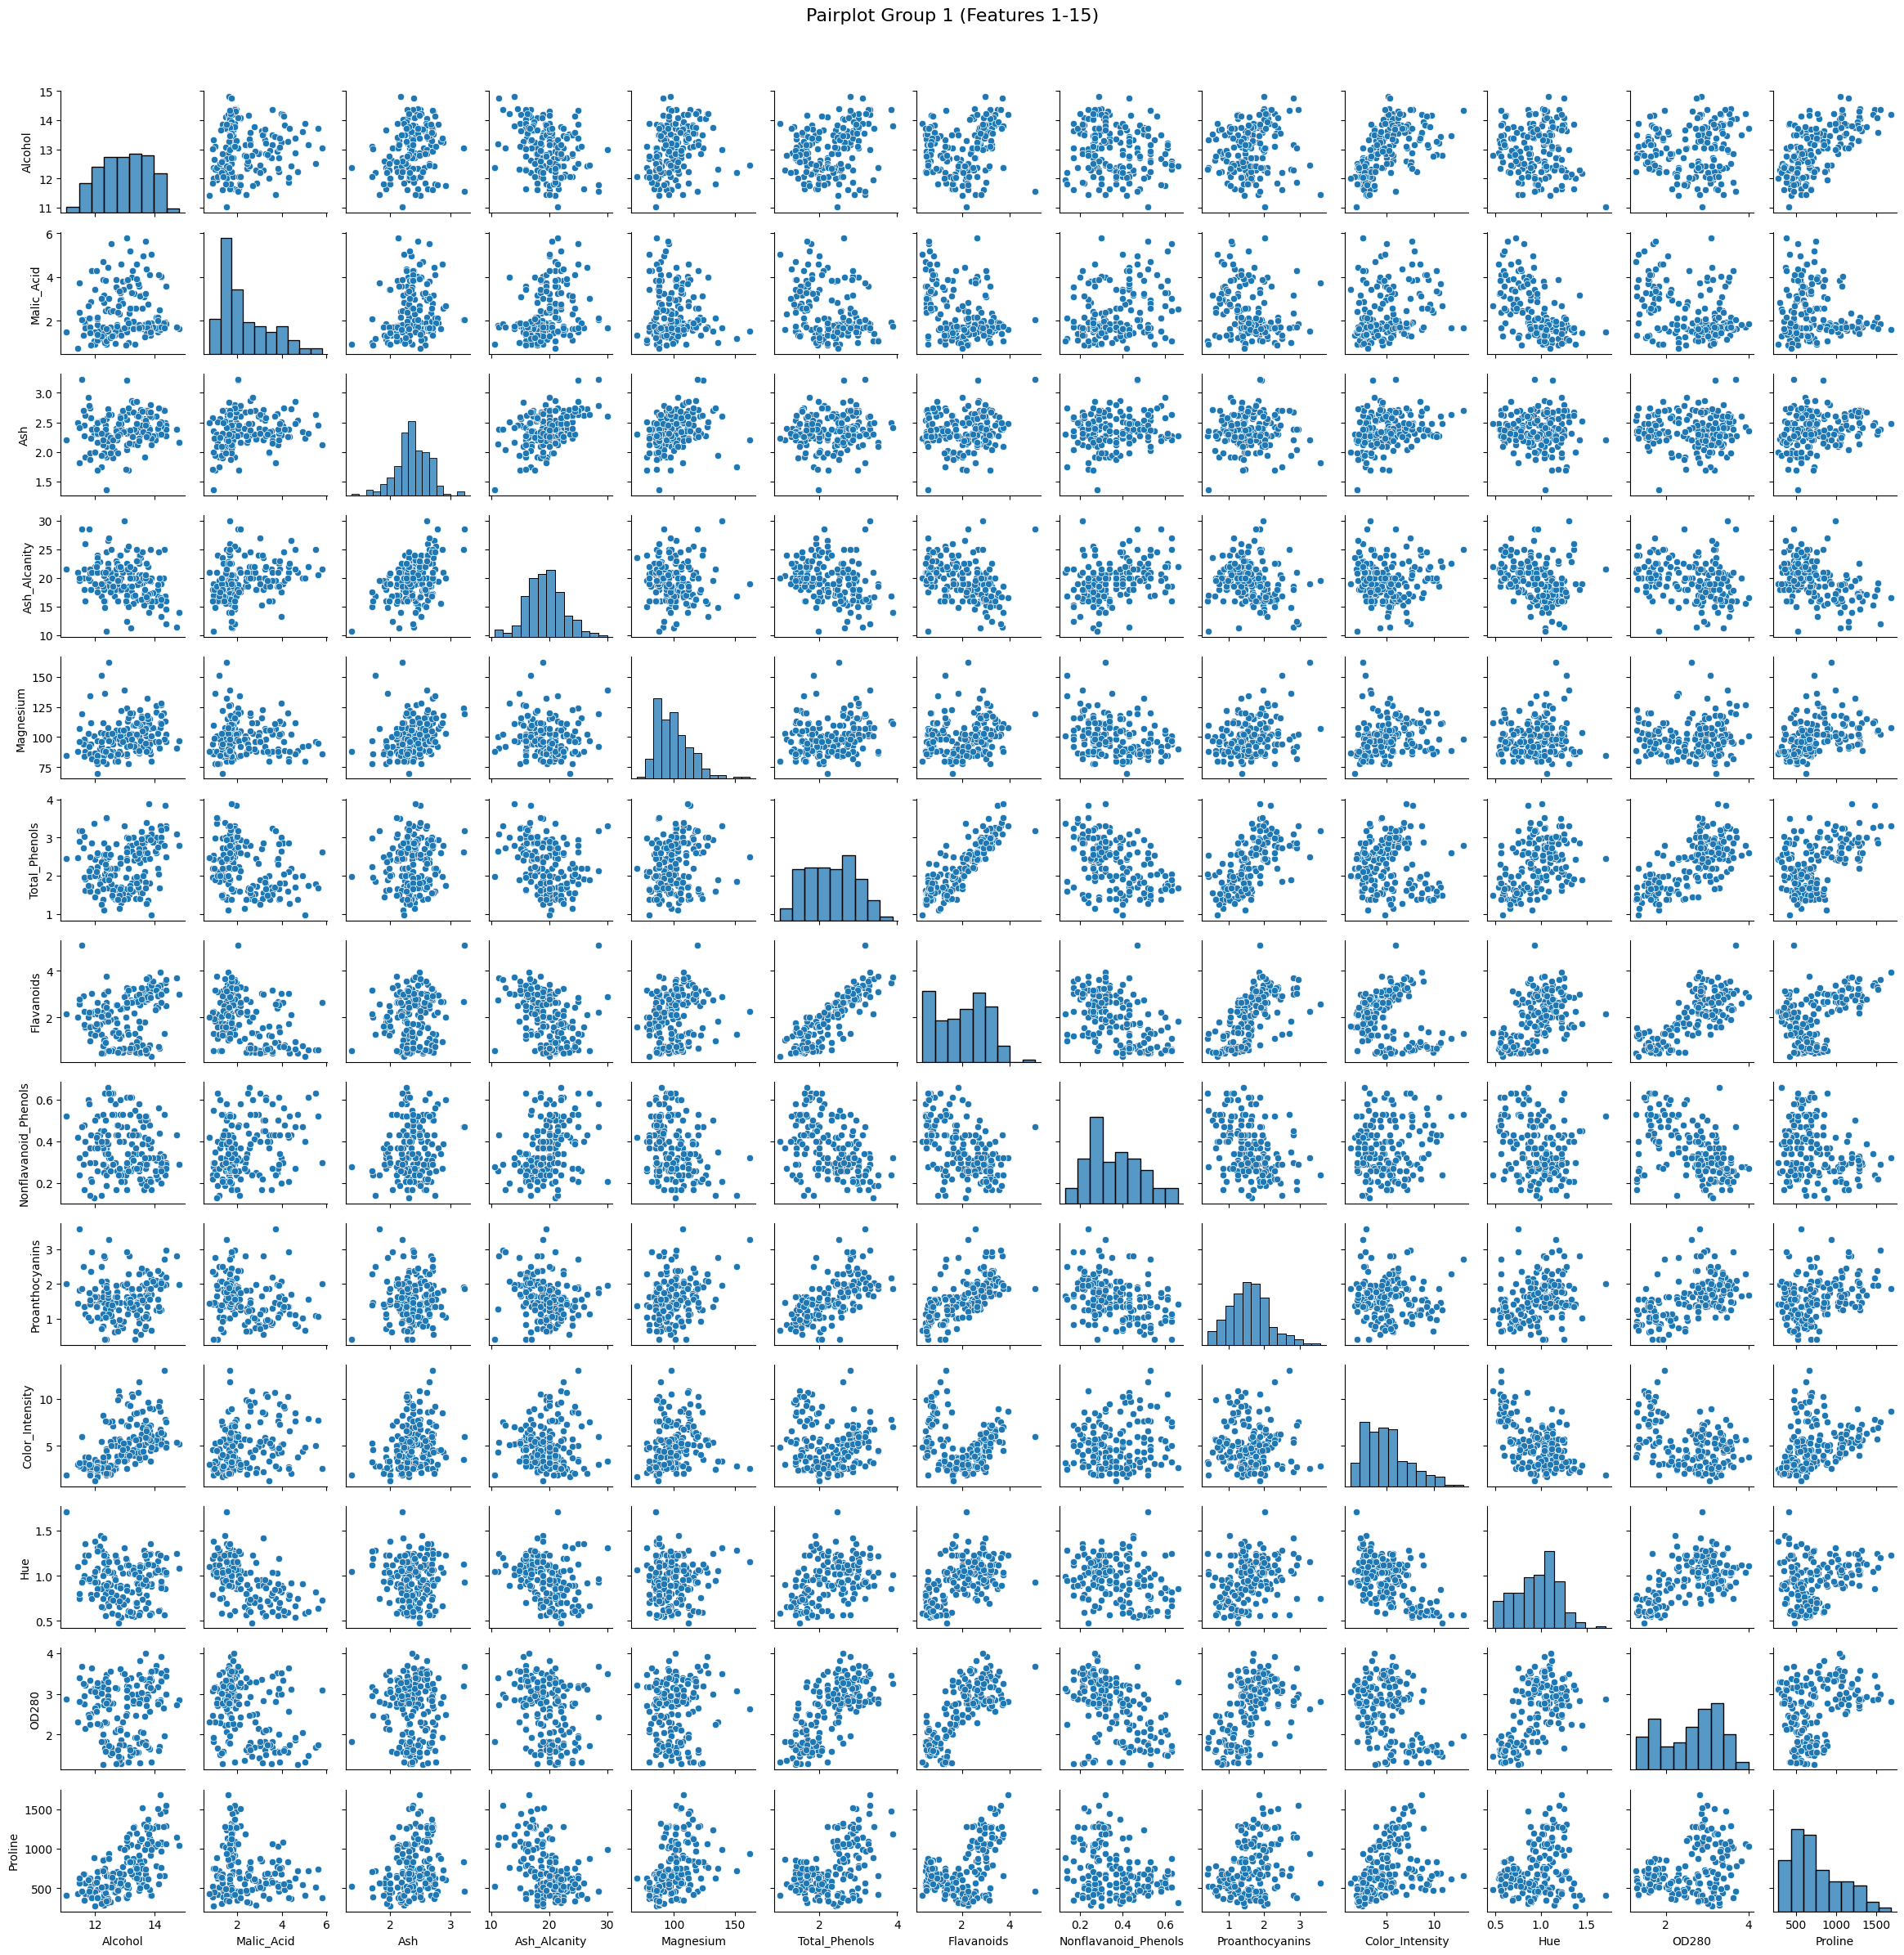

In [16]:
plt.figure(figsize=(20, 20))
g1 = sns.pairplot(X, height=1.8, corner=False)
plt.suptitle('Pairplot Group 1 (Features 1-15)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

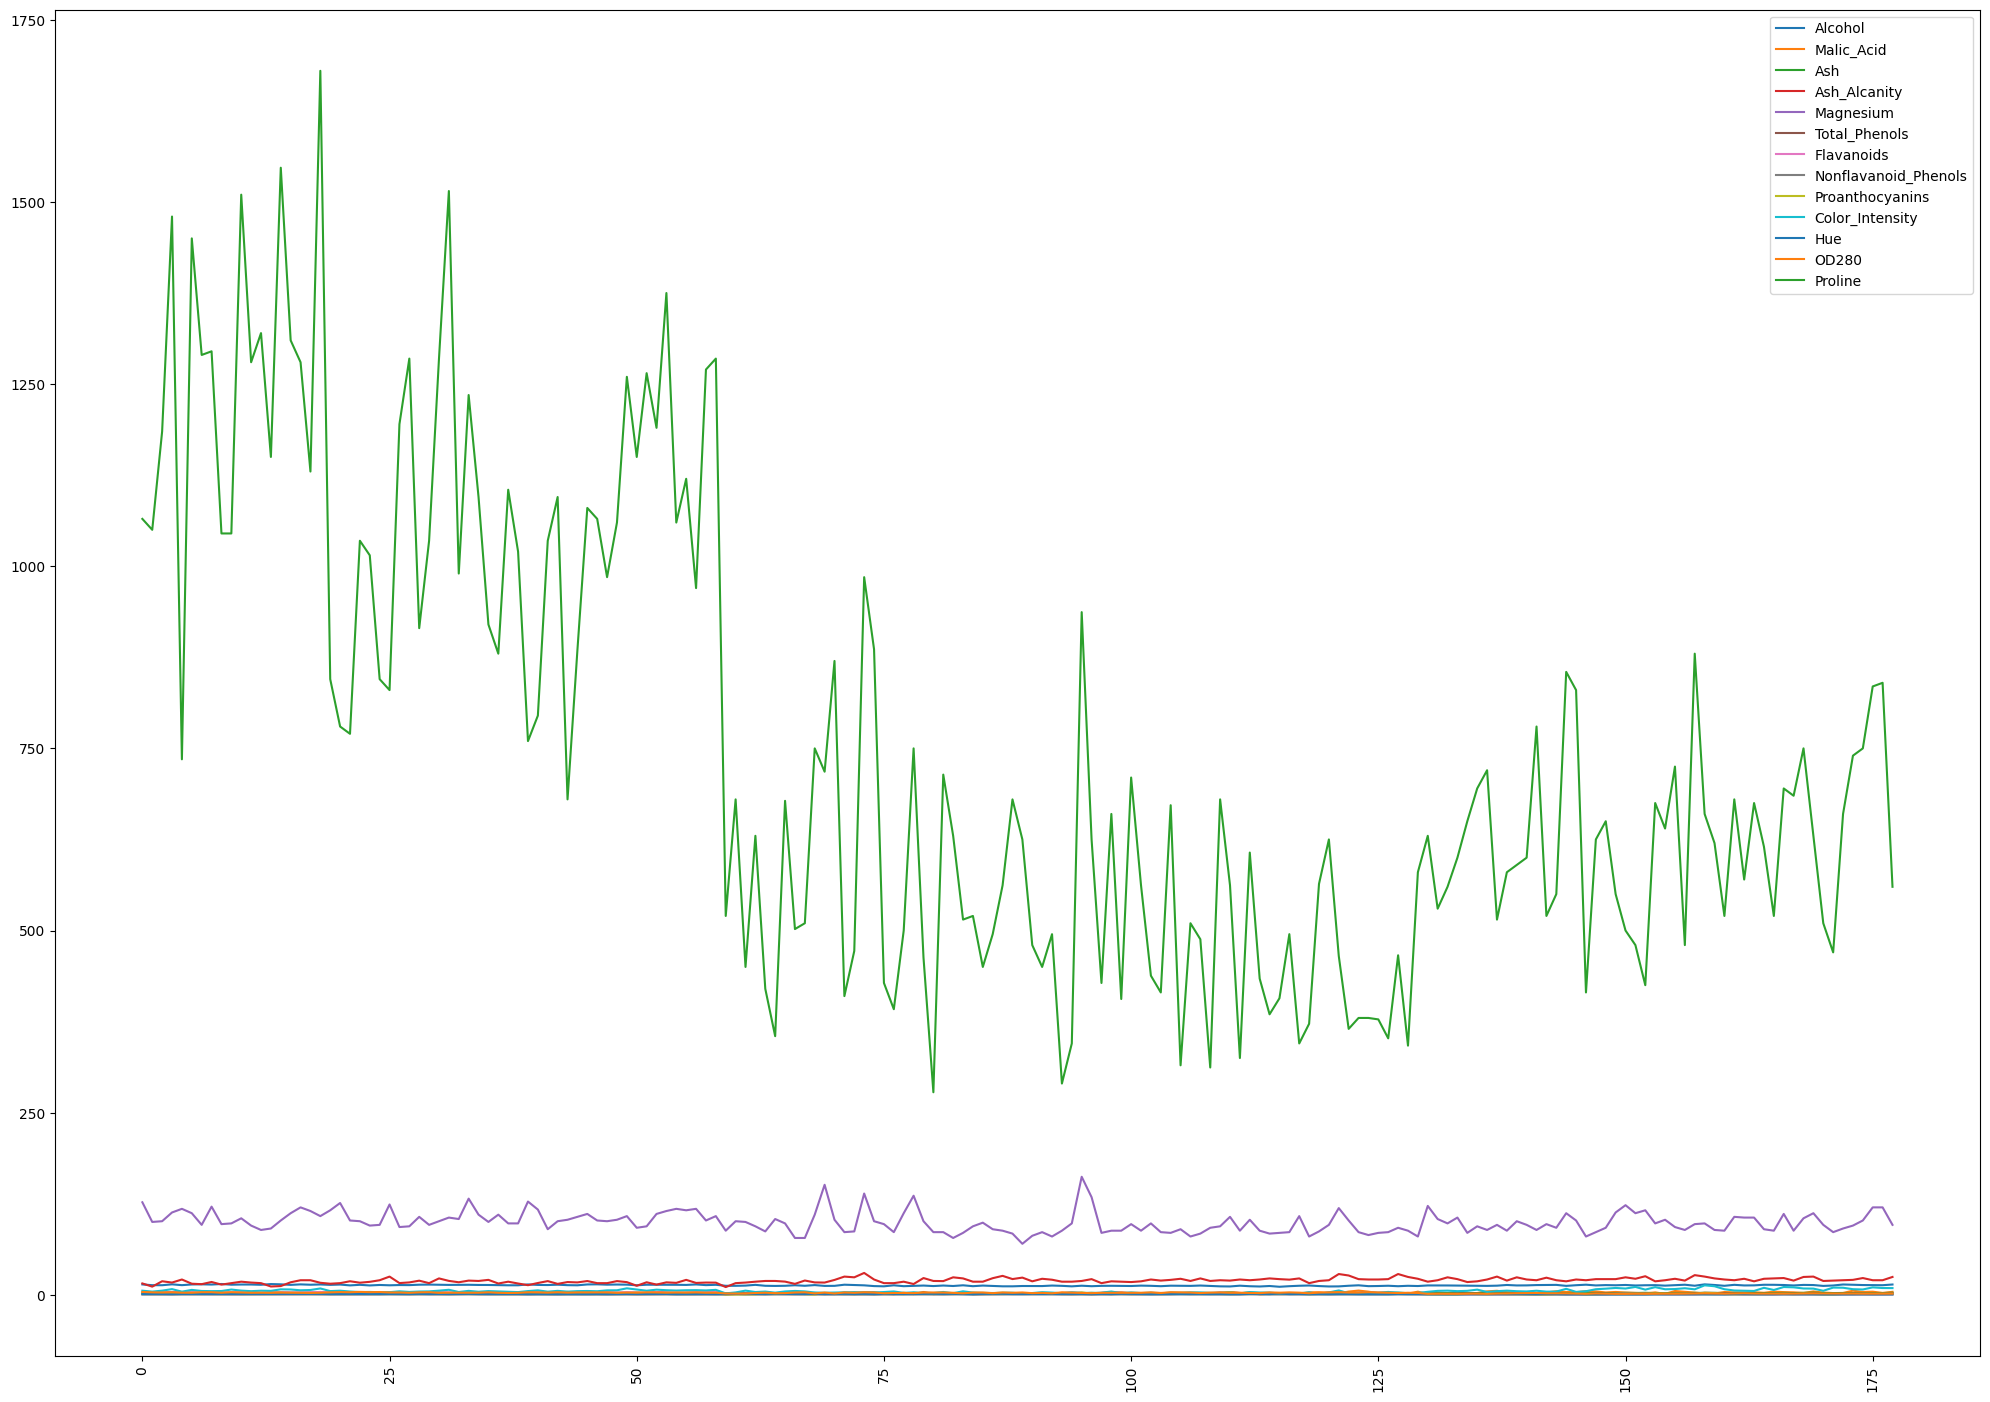

In [17]:
X.plot(figsize=(20, 14))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

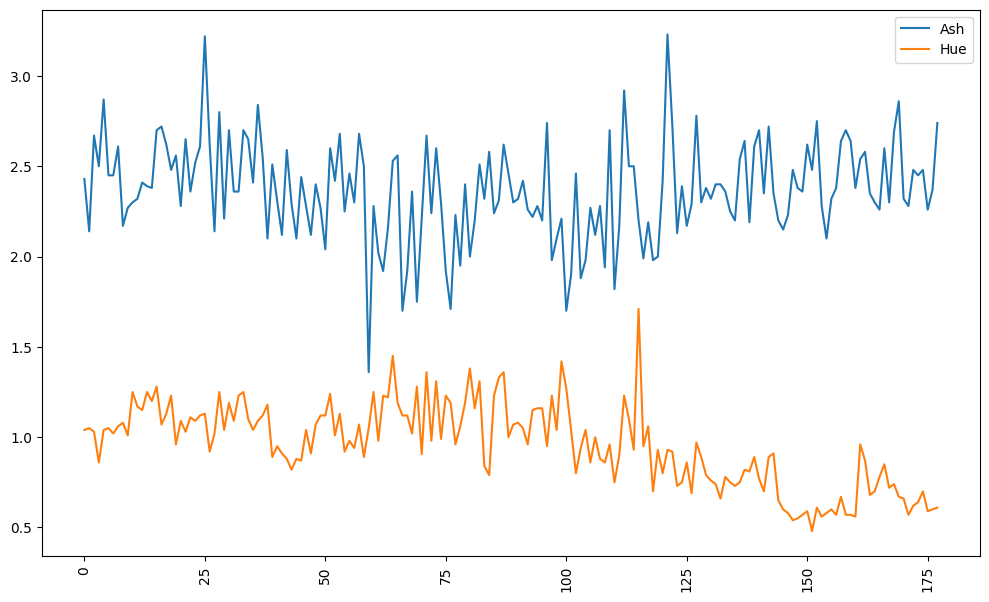

In [19]:
X[['Ash','Hue']].plot(figsize=(10, 6))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Hue', ylabel='Proline'>

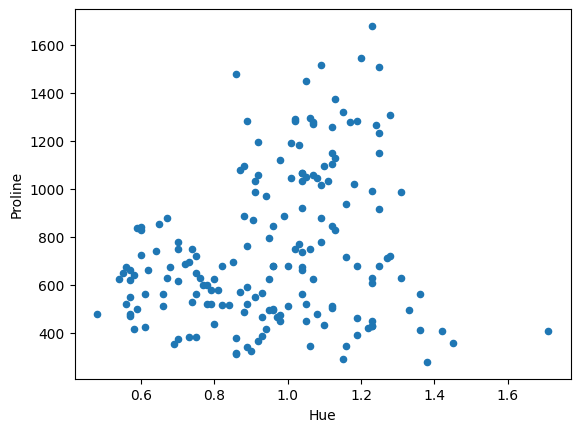

In [20]:
X.plot(kind= 'scatter', x ='Hue', y = 'Proline')

<Axes: >

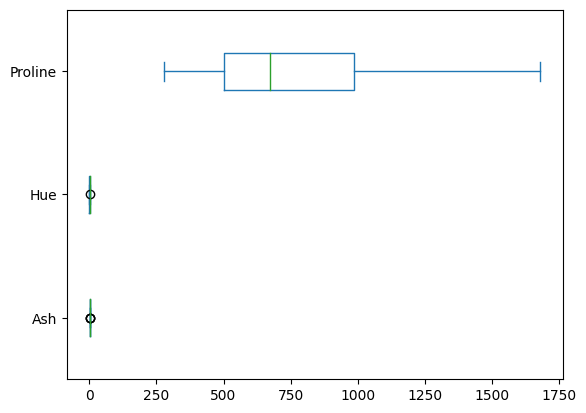

In [21]:
X[['Ash','Hue','Proline']].plot(kind = 'box', vert = False)

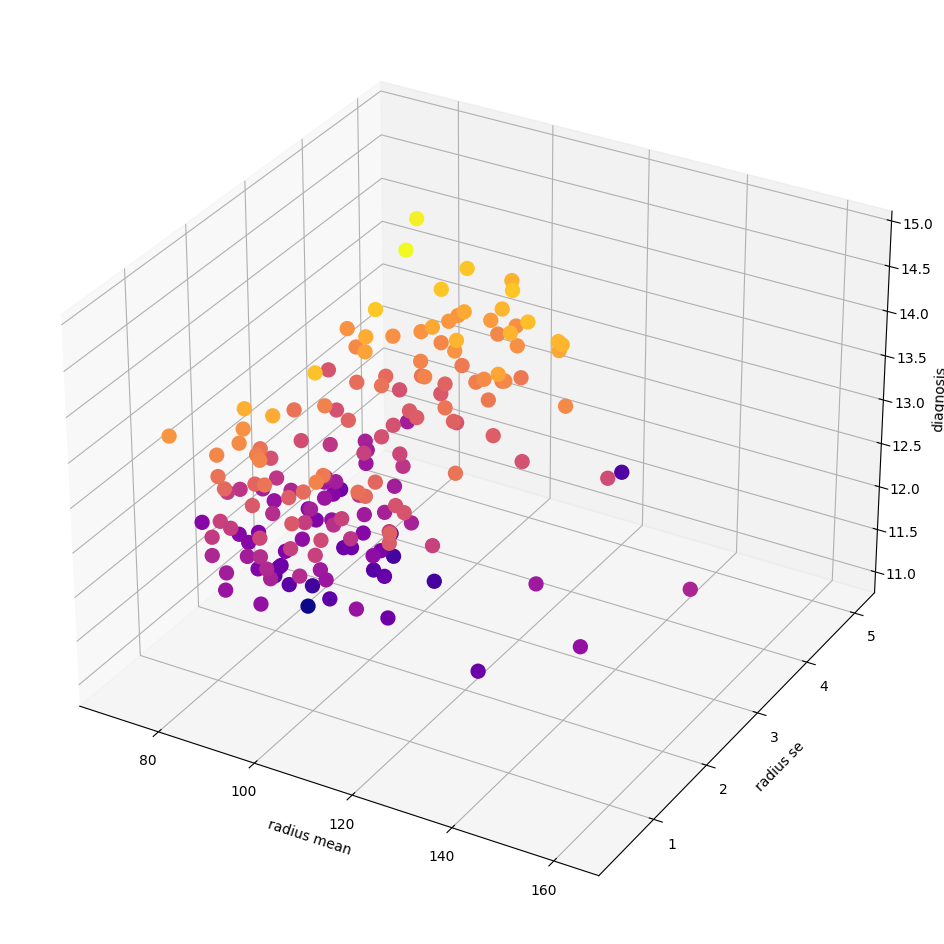

In [22]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = X["Magnesium"]
y = X["Flavanoids"]
z = X["Alcohol"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("radius mean")
ax.set_ylabel("radius se")
ax.set_zlabel("diagnosis")

plt.show()

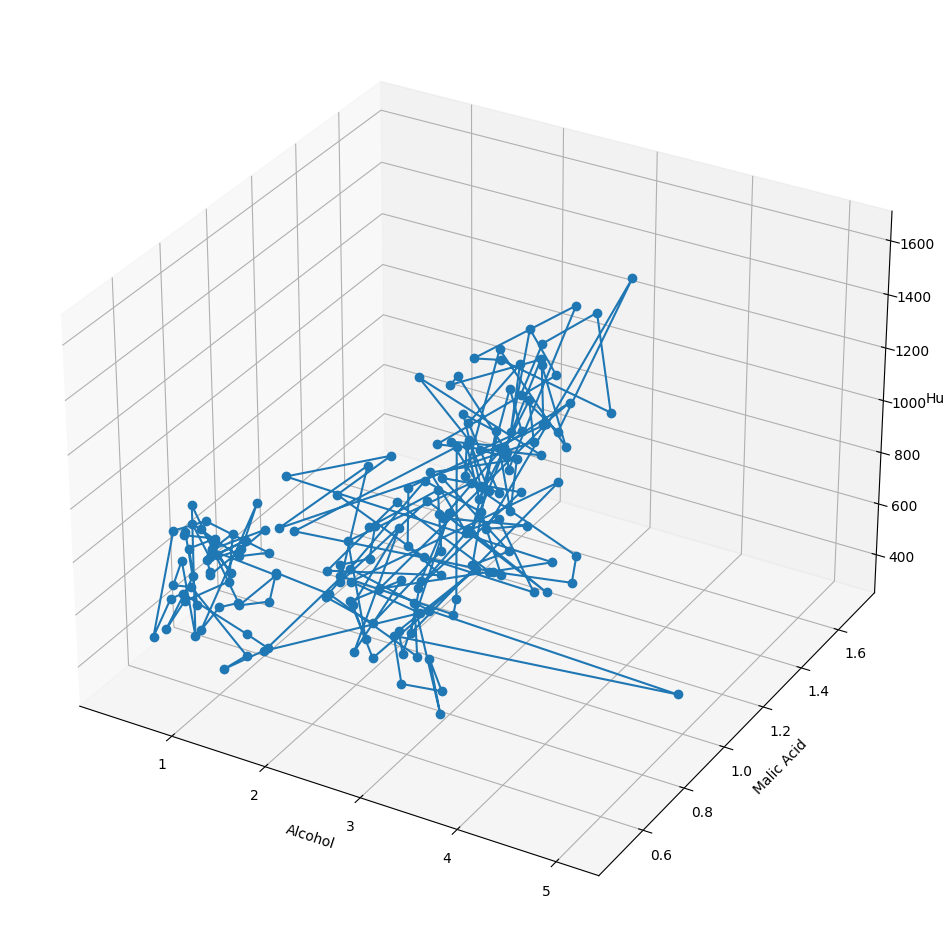

In [23]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X["Flavanoids"], X["Hue"], X["Proline"], marker='o')

ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic Acid")
ax.set_zlabel("Hue")

plt.show()

In [25]:
alpha = 0.05 

normality_results = {}

for col in X.columns:  
    stat, p = stats.shapiro(X[col].dropna()) 
    normal = "Tidak Normal" if p < alpha else "Normal"
    
    normality_results[col] = {"Statistik": stat, "p-value": p, "Keterangan": normal}

for col, result in normality_results.items():
    print(f"Uji Normalitas {col}: Statistik={result['Statistik']:.4f}, p-value={result['p-value']:.4f} -> {result['Keterangan']}")

Uji Normalitas Alcohol: Statistik=0.9818, p-value=0.0201 -> Tidak Normal
Uji Normalitas Malic_Acid: Statistik=0.8888, p-value=0.0000 -> Tidak Normal
Uji Normalitas Ash: Statistik=0.9839, p-value=0.0387 -> Tidak Normal
Uji Normalitas Ash_Alcanity: Statistik=0.9902, p-value=0.2639 -> Normal
Uji Normalitas Magnesium: Statistik=0.9383, p-value=0.0000 -> Tidak Normal
Uji Normalitas Total_Phenols: Statistik=0.9767, p-value=0.0044 -> Tidak Normal
Uji Normalitas Flavanoids: Statistik=0.9545, p-value=0.0000 -> Tidak Normal
Uji Normalitas Nonflavanoid_Phenols: Statistik=0.9625, p-value=0.0001 -> Tidak Normal
Uji Normalitas Proanthocyanins: Statistik=0.9807, p-value=0.0145 -> Tidak Normal
Uji Normalitas Color_Intensity: Statistik=0.9403, p-value=0.0000 -> Tidak Normal
Uji Normalitas Hue: Statistik=0.9813, p-value=0.0174 -> Tidak Normal
Uji Normalitas OD280: Statistik=0.9450, p-value=0.0000 -> Tidak Normal
Uji Normalitas Proline: Statistik=0.9312, p-value=0.0000 -> Tidak Normal


In [26]:
alpha = 0.05

X_feature = X.drop(columns='Proline', axis=1)
X_OLS = sm.add_constant(X_feature)
y_OLS = X['Proline'] 

X_OLS = X_OLS.dropna()
y_OLS = y_OLS.loc[X_OLS.index]

model_OLS = sm.OLS(y_OLS, X_OLS).fit()

f_statistic = model_OLS.fvalue
f_pvalue = model_OLS.f_pvalue
r_squared = model_OLS.rsquared

keterangan_f = "Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)" if f_pvalue < alpha else "Gagal Tolak H0: Model tidak signifikan"

print("\nHasil Analisis Regresi OLS:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value (F-test): {f_pvalue:.4f}")
print(f"Koefisien Determinasi (R-squared): {r_squared:.4f}")
print(f"Kesimpulan F-test: {keterangan_f}")

print("\nKoefisien dan Signifikansi Variabel:")
for var in X_feature.columns:
    coef = model_OLS.params[var]
    pval = model_OLS.pvalues[var]
    signif = "Signifikan" if pval < alpha else "Tidak signifikan"
    print(f"{var}: koef={coef:.4f}, p-value={pval:.4f} -> {signif}")

print("\nRingkasan Lengkap Model:")
print(model_OLS.summary())


Hasil Analisis Regresi OLS:
F-statistic: 25.0779
p-value (F-test): 0.0000
Koefisien Determinasi (R-squared): 0.6459
Kesimpulan F-test: Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)

Koefisien dan Signifikansi Variabel:
Alcohol: koef=133.1779, p-value=0.0000 -> Signifikan
Malic_Acid: koef=-12.8647, p-value=0.4443 -> Tidak signifikan
Ash: koef=231.9312, p-value=0.0028 -> Signifikan
Ash_Alcanity: koef=-27.0352, p-value=0.0000 -> Signifikan
Magnesium: koef=2.7687, p-value=0.0220 -> Signifikan
Total_Phenols: koef=23.6959, p-value=0.6258 -> Tidak signifikan
Flavanoids: koef=23.6462, p-value=0.5418 -> Tidak signifikan
Nonflavanoid_Phenols: koef=-84.4693, p-value=0.5912 -> Tidak signifikan
Proanthocyanins: koef=13.6391, p-value=0.7038 -> Tidak signifikan
Color_Intensity: koef=26.4444, p-value=0.0149 -> Signifikan
Hue: koef=217.5114, p-value=0.0319 -> Signifikan
OD280: koef=24.4829, p-value=0.5407 -> Tidak signifikan

Ringkasan Lengkap Model:
                            OLS Regr

In [31]:
residuals_squared = model_OLS.resid ** 2

bp_test = het_breuschpagan(model_OLS.resid, model_OLS.model.exog)

alpha = 0.05
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
result = dict(zip(labels, bp_test))

print(f"LM Statistic: {result['Lagrange multiplier statistic']:.4f}")
print(f"p-value: {result['p-value']:.4f}")
print(f"F-statistic: {result['f-value']:.4f}")
print(f"F p-value: {result['f p-value']:.4f}")

if result['p-value'] < alpha:
    print("\nKesimpulan: Tolak H0 - Terdapat bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))
else:
    print("\nKesimpulan: Gagal tolak H0 - Tidak ada bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))

print("\n[Catatan]")
print("1. Jika terdeteksi heteroskedastisitas, pertimbangkan:")
print("   - Transformasi variabel dependen (log, sqrt)")
print("   - Model WLS (Weighted Least Squares)")
print("   - Error standar robust (Huber-White)")

LM Statistic: 18.7793
p-value: 0.0940
F-statistic: 1.6217
F p-value: 0.0899

Kesimpulan: Gagal tolak H0 - Tidak ada bukti heteroskedastisitas (p = 0.0940)

[Catatan]
1. Jika terdeteksi heteroskedastisitas, pertimbangkan:
   - Transformasi variabel dependen (log, sqrt)
   - Model WLS (Weighted Least Squares)
   - Error standar robust (Huber-White)


In [29]:
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_feature.columns
vif_data["VIF"] = [variance_inflation_factor(X_feature.values, i) for i in range(X_feature.shape[1])]

def interpret_vif(vif):
    if vif < 5:
        return "Tidak ada masalah multikolinearitas"
    elif 5 <= vif < 10:
        return "Indikasi multikolinearitas"
    else:
        return "Multikolinearitas tinggi (perlu perhatian)"

vif_data["Keterangan"] = vif_data["VIF"].apply(interpret_vif)

print(vif_data)

                Variabel         VIF  \
0                Alcohol  202.368665   
1             Malic_Acid    8.906072   
2                    Ash  156.287576   
3           Ash_Alcanity   57.181385   
4              Magnesium   66.608202   
5          Total_Phenols   62.759695   
6             Flavanoids   35.148953   
7   Nonflavanoid_Phenols   16.444559   
8        Proanthocyanins   17.113698   
9        Color_Intensity   15.782640   
10                   Hue   44.963205   
11                 OD280   54.537170   

                                    Keterangan  
0   Multikolinearitas tinggi (perlu perhatian)  
1                   Indikasi multikolinearitas  
2   Multikolinearitas tinggi (perlu perhatian)  
3   Multikolinearitas tinggi (perlu perhatian)  
4   Multikolinearitas tinggi (perlu perhatian)  
5   Multikolinearitas tinggi (perlu perhatian)  
6   Multikolinearitas tinggi (perlu perhatian)  
7   Multikolinearitas tinggi (perlu perhatian)  
8   Multikolinearitas tinggi (perlu pe

In [30]:
alpha = 0.05 

def mardias_test(data):
    n, p = data.shape
    mean = data.mean(axis=0)
    cov = data.cov()
    inv_cov = np.linalg.inv(cov)
    centered_data = data - mean
    skewness = np.sum(np.dot(centered_data, inv_cov) ** 3) / n
    kurtosis = np.sum(np.dot(centered_data, inv_cov) ** 4) / n
    return skewness, kurtosis

numerical_data = X_feature.select_dtypes(include=[np.number])

skewness, kurtosis = mardias_test(numerical_data)

p = numerical_data.shape[1]
df_skewness = p * (p + 1) * (p + 2) / 6
expected_kurtosis = p * (p + 2)

interpretasi_skewness = "Data tidak normal multivariat (tolak H0)" if skewness > stats.chi2.ppf(1-alpha, df_skewness) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

interpretasi_kurtosis = "Data tidak normal multivariat (tolak H0)" if abs(kurtosis - expected_kurtosis) > 2*np.sqrt(8*p*(p+2)/len(numerical_data)) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

print("\nHasil Uji Normalitas Multivariat Mardia:")
print(f"Jumlah observasi (n): {len(numerical_data)}")
print(f"Jumlah variabel (p): {p}")
print(f"\nKoefisien Skewness Mardia: {skewness:.4f}")
print(f"Nilai kritis Chi-square (α=0.05, df={df_skewness:.0f}): {stats.chi2.ppf(1-alpha, df_skewness):.4f}")
print(f"Interpretasi Skewness: {interpretasi_skewness}")
print(f"\nKoefisien Kurtosis Mardia: {kurtosis:.4f}")
print(f"Nilai harapan kurtosis: {expected_kurtosis:.4f}")
print(f"Interpretasi Kurtosis: {interpretasi_kurtosis}")
print(f"\nCatatan:")
print("1. Uji ini sensitif terhadap ukuran sampel besar")
print("2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel")
print("3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik")


Hasil Uji Normalitas Multivariat Mardia:
Jumlah observasi (n): 178
Jumlah variabel (p): 12

Koefisien Skewness Mardia: 288.9692
Nilai kritis Chi-square (α=0.05, df=364): 409.4882
Interpretasi Skewness: Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)

Koefisien Kurtosis Mardia: 62345.4990
Nilai harapan kurtosis: 168.0000
Interpretasi Kurtosis: Data tidak normal multivariat (tolak H0)

Catatan:
1. Uji ini sensitif terhadap ukuran sampel besar
2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel
3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik


In [87]:
outlier_detection = OneClassSVM()

In [88]:
outlier_prediksi = outlier_detection.fit_predict(X)

In [89]:
X = X[outlier_prediksi == 1]

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 4 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               89 non-null     float64
 1   Malic_Acid            89 non-null     float64
 2   Ash                   89 non-null     float64
 3   Ash_Alcanity          89 non-null     float64
 4   Magnesium             89 non-null     int64  
 5   Total_Phenols         89 non-null     float64
 6   Flavanoids            89 non-null     float64
 7   Nonflavanoid_Phenols  89 non-null     float64
 8   Proanthocyanins       89 non-null     float64
 9   Color_Intensity       89 non-null     float64
 10  Hue                   89 non-null     float64
 11  OD280                 89 non-null     float64
 12  Proline               89 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 9.7 KB


In [91]:
scaler = StandardScaler()

In [92]:
X_scaled = scaler.fit_transform(X)

In [93]:
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [94]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
4,0.478628,-0.024593,1.688089,0.274067,1.049999,1.229336,1.231134,-0.006661,0.586149,-0.421958,0.708519,0.759208,0.333364
19,1.041905,0.395056,0.624261,-1.609731,0.923630,1.059391,1.596550,-1.636943,0.323093,-0.112445,0.346220,1.335923,1.181503
20,1.633346,-0.814519,-0.336615,-1.349897,1.555475,1.569227,1.747015,-1.118217,1.046497,0.105802,0.934956,1.805342,0.680330
21,0.042088,0.971044,0.933114,-0.505436,0.039047,0.566549,0.930204,-1.044113,0.849205,-0.350532,0.663232,1.550515,0.603227
24,0.844758,-0.666408,0.795846,-0.050726,-0.340060,0.770483,1.145154,-0.821802,0.323093,-0.739407,1.070818,1.952874,1.181503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.140478,2.493298,0.246774,0.111670,-0.403245,-0.674054,-1.004349,0.956687,-0.663366,0.919265,-1.102977,-0.836817,0.371916
174,0.703938,1.061556,0.349725,0.923652,0.039047,-0.470119,-0.853884,0.289754,-0.087932,0.760541,-0.831253,-1.078232,0.449020
175,0.520873,1.366007,-0.405249,-0.050726,1.176368,-0.827005,-0.918369,0.289754,-0.186578,1.911294,-1.329414,-1.078232,1.104400
176,0.380054,-0.024593,-0.027762,-0.050726,1.176368,-0.725037,-0.929117,1.030791,-0.005727,1.554164,-1.284127,-0.997761,1.142951


In [95]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=100)
    kmeans.fit(X)

    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

In [96]:
inertia_diff = [inertia[i-1] - inertia[i] for i in range(1, len(inertia))]
inertia_rel_diff = [inertia_diff[i] / inertia_diff[0] for i in range(len(inertia_diff))]
optimal_k_inertia = 0
for i in range(len(inertia_rel_diff)):
    if i < len(inertia_rel_diff) - 1 and inertia_rel_diff[i+1] < 0.05:
        optimal_k_inertia = K[i+1]
        break

optimal_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]

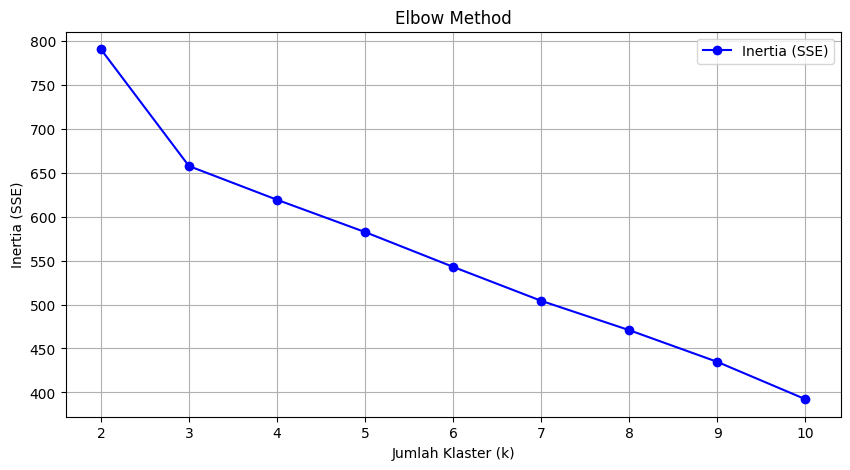

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inertia (SSE)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.legend()
plt.grid(True)
plt.show()

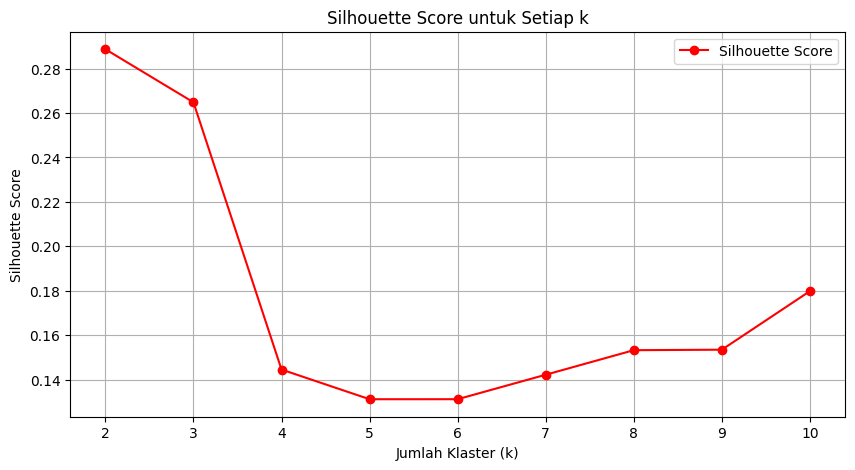

K optimal berdasarkan Silhouette Score: 2


In [98]:
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap k')
plt.legend()
plt.grid(True)
plt.show()
print(f"K optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

In [99]:
model = KMeans(n_clusters=optimal_k_silhouette, init='k-means++', random_state=42, max_iter=400)
labels = model.fit_predict(X)

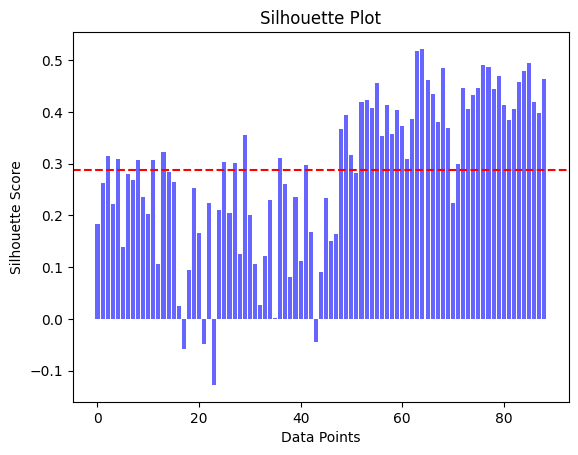

In [100]:
silhouette_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)

plt.bar(range(len(silhouette_vals)), silhouette_vals, color='blue', alpha=0.6)
plt.axhline(y=avg_score, color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

In [109]:
silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

davies_bouldin_score = davies_bouldin_score(X, labels)
print(davies_bouldin_score)

calinski_harabasz_score = calinski_harabasz_score(X, labels)
print(calinski_harabasz_score)

0.36791763330179367
1.399062068879657
40.334183855282916


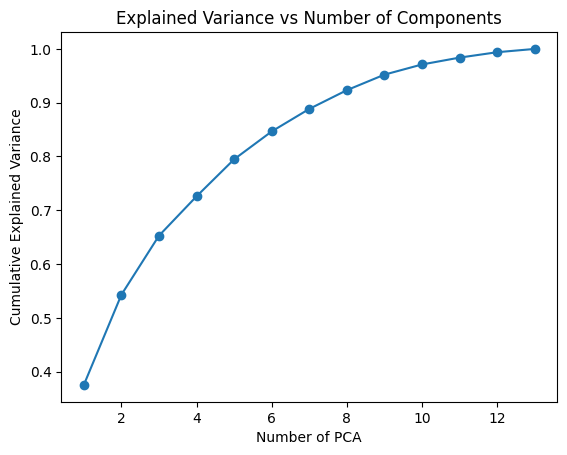

Optimal number of PCA components: 9


In [103]:
pca = PCA().fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.xlabel('Number of PCA')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Optimal number of PCA components: {optimal_components}")

In [104]:
model_pca = PCA(n_components = 2)
x_PCA = model_pca.fit_transform(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


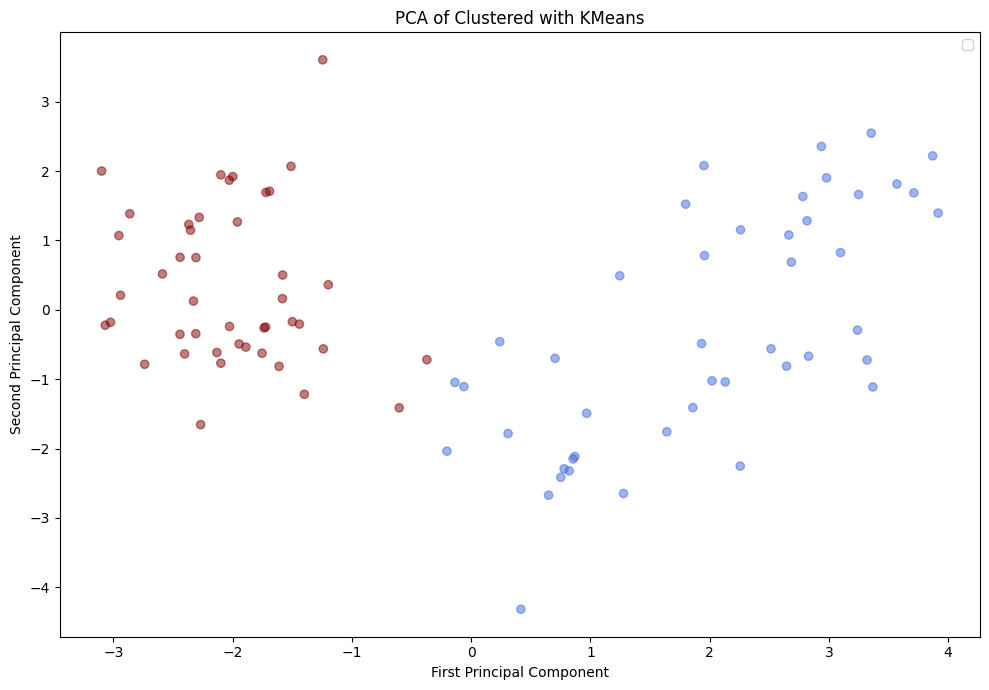

In [105]:
plt.figure(figsize=(10, 7))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
cluster_colors = vectorizer(labels)
cluster_colors[labels == -1] = 'black'

plt.scatter(x_PCA[:, 0], x_PCA[:, 1], c=cluster_colors, alpha=0.5)
plt.title("PCA of Clustered with KMeans")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")


plt.legend()

plt.tight_layout()
plt.show()

In [106]:
X['PCA1'] = x_PCA[:,0]
X['PCA2'] = x_PCA[:,1]

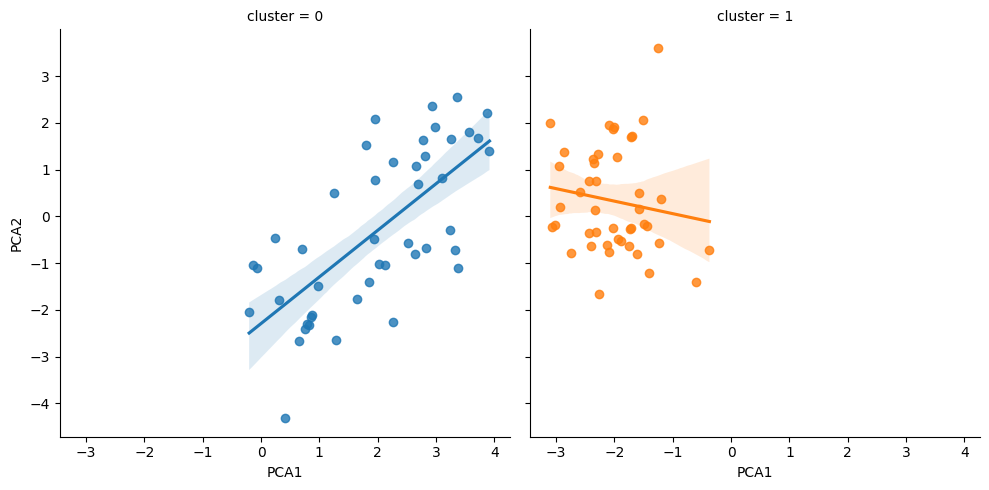

In [107]:
X['cluster'] = labels
sns.lmplot(x = "PCA1",y = "PCA2", data =X, hue = 'cluster', col='cluster',fit_reg = True)